ECGR 4105 Homework 2 | Khang Vu 801059139 | October 1, 2022

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

Problem 1 (20 points)

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall. At the end, plot the confusion matrix representing your binary classifier. 

In [2]:
file_path = '/content/drive/MyDrive/Machine Learning/diabetes.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
#In the dataset we’ll consider Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age as the Independent variables
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values 
Y = df.iloc[:, 8].values 

In [5]:
#Feature Scaling for better accuracy
sc_X = StandardScaler() 
X = sc_X.fit_transform(X) 
X[0:10]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858, -0.27575966],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  , -0.61611067],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653, -0.36084741],
       [-0.54791859,  2.38188392

In [6]:
#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0)

In [7]:
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train) 

LogisticRegression(random_state=0)

In [8]:
Y_pred = classifier.predict(X_test) 
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [9]:
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix 

array([[98,  9],
       [18, 29]])

In [10]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

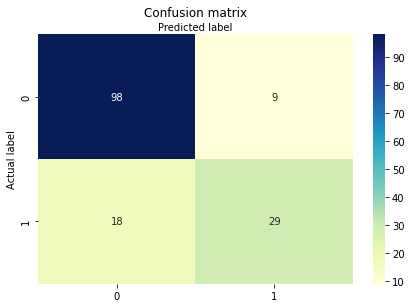

In [11]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

Problem 2 (20 points)

Repeat problem 1, and this time use K-fold cross-validation for your training and validation. Perform the training two times for K=5 and K=10. Analyze and compare your average accuracy against problem 1.

In [12]:
file_path = '/content/drive/MyDrive/Machine Learning/diabetes.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#In the dataset we’ll consider Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age as the Independent variables
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values 
Y = df.iloc[:, 8].values 

In [14]:
#Feature Scaling for better accuracy
sc_X = StandardScaler() 
X = sc_X.fit_transform(X) 

In [15]:
#5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.600% (2.777%)


In [16]:
#10 folds selected
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.604% (5.036%)


Problem 3 (30pts):

1. Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your results, including accuracy, precision, and recall. At the end, plot the confusion matrix representing your binary classifier. 
2. How about adding weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the results.

In [17]:
breast = load_breast_cancer()
X = breast.data
Y = breast.target

In [18]:
X.shape

(569, 30)

In [19]:
Y.shape

(569,)

In [20]:
#Feature Scaling for better accuracy
sc_X = StandardScaler() 
X = sc_X.fit_transform(X) 

In [21]:
#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0)

In [22]:
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train) 

LogisticRegression(random_state=0)

In [23]:
Y_pred = classifier.predict(X_test) 
Y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1])

In [24]:
cnf_matrix = confusion_matrix(Y_test, Y_pred) 
cnf_matrix 

array([[45,  2],
       [ 2, 65]])

In [25]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

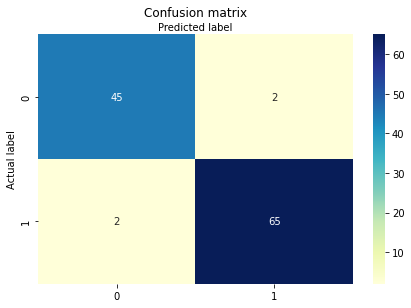

In [26]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

Time to redo with weights

In [27]:
breast = load_breast_cancer()
X = breast.data
Y = breast.target

In [28]:
#Feature Scaling for better accuracy
sc_X = StandardScaler() 
X = sc_X.fit_transform(X) 

In [29]:
#Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0)

In [30]:
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, Y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

# performance
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Problem 4 (30pts):

1. Repeat problem 3, and this time use K-fold cross-validation for your training and validation. Perform the training two times for K=5 and K=10. Analyze and compare your average accuracy against problem 3. 

2. How about adding weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the average accuracy.

In [31]:
breast = load_breast_cancer()
X = breast.data
Y = breast.target

In [32]:
#Feature Scaling for better accuracy
sc_X = StandardScaler() 
X = sc_X.fit_transform(X) 

In [33]:
#5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.193% (1.701%)


In [34]:
#10 folds selected
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.895% (2.046%)


In [35]:
#Time to redo with weights
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X, Y)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [36]:
#5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.193% (1.701%)


In [37]:
#10 folds selected
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.895% (2.046%)
